<a href="https://colab.research.google.com/github/eermis1/Data_Analytics/blob/master/Tutorial%20Notebooks/FCN_MNIST_Classification_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Image Classification With Keras**

## **1. Import Required Libraries**

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


## **2. Extract and Evaluate Data**

In [0]:
# Exract (x_train, y_train) and (x_test, y_test) data from MNIST dataset.
# Contrary to <tensorflow.examples.tutorials.mnist import input_data> the data does not contain (x_valid, y_valid)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Evaluate dataset

print("Shape of x_train =" + " " + str(x_train.shape))
print("Shape of x_test =" + " " + str(x_test.shape))
print(".  --> Contrary to <tensorflow.examples.tutorials.mnist import input_data>, x_train and x_test are already in shape of 28x28")
print("\n" + "Now, lets have a look at a particular data in training set" +"\n")
#print("x_train[0]=")
#print(x_train[0])
print("Max pixel data of x_train[0]=" + " " + str(x_train[0].max()))
print("Min pixel data of x_train[0]=" + " " + str(x_train[0].min()))
print(".  --> As you seen as above, the pixel data is not in a range between 0 and 1 (grayscale)")
print(".  --> To improve the the performance, make it easy to learn for network it is better to normalize them.")



Shape of x_train = (60000, 28, 28)
Shape of x_test = (10000, 28, 28)
.  --> Contrary to <tensorflow.examples.tutorials.mnist import input_data>, x_train and x_test are already in shape of 28x28

Now, lets have a look at a particular data in training set

Max pixel data of x_train[0]= 255
Min pixel data of x_train[0]= 0
.  --> As you seen as above, the pixel data is not in a range between 0 and 1 (grayscale)
.  --> To improve the the performance, make it easy to learn for network it is better to normalize them.


In [0]:
# Normalization of x_train, x_test

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
#x_train[0] Process is completed 

Shape of y_train = (60000,)
Shape of y_test = (10000,)
Value of y_train[0] = 5


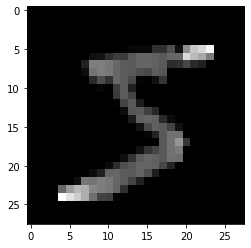

.  --> Shapes are align with x_train and x_test. Everything seems normal to proceed.


In [0]:
# What about labels, y_train and y_test ?
print("Shape of y_train =" + " " + str(y_train.shape))
print("Shape of y_test =" + " " + str(y_test.shape))
print("Value of y_train[0] =" + " " + str(y_train[0]))
plt.imshow(x_train[0], cmap='gray')
plt.show()
print(".  --> Shapes are align with x_train and x_test. Everything seems normal to proceed.")


## **3. Building the First Model**

In [0]:
model = tf.keras.models.Sequential()

# Input Layer
model.add(tf.keras.layers.Flatten()) # Flatten 28*28 data to vector of 784

# Hidden Layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Number of noron = 128
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Number of noron = 128

# Output Layer
# Number of noron = 10 to be able to have comparable data with the labels
# Sofmax is used to detect the most possible data index easily with argmax.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # Number of noron = 10 to have a label layer


# Parameter Selection for Training

model.compile(optimzer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 3)



In [0]:
# Lets evaluate the model on test data

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss= " + str(test_loss))
print("Test Accuracy= "+ str(test_accuracy))
print("\n" + ".  --> Test Accuracy is also high, no overfitting. Everthing seems OK")

## **4. Getting Predictions from the Model**

In [0]:
predictions = model.predict([x_test]) # Predicts y values of every x_test data

In [0]:
print(predictions[0])
print("\n" + ".  --> Seems very complicated, lets have a look with a different approach")

In [0]:
print("The predicted value of x_test[0] is=" + " " + str(np.argmax(predictions[0])))
print("\n" + ".  --> Argmax returns the largest value's index which is the predicted value of particular datapoint")

print("\n" + "The actual value of x_test[0] is=" + " " + str(y_test[0]))

print("\n" + ".  --> Everything seems OK")

In [0]:
model.save("first_classification_with_keras")